In [1]:
import numpy as np
import pandas as pd
import datetime
import json
import requests
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from IPython.display import Image
from sklearn.svm import SVR
from scipy.optimize import fsolve
%matplotlib inline 

In [2]:
PueblaMet = pd.read_csv('Metadata/Puebla.csv')
TolucaMet = pd.read_csv('Metadata/Toluca.csv')
MoreliaMet = pd.read_csv('Metadata/Morelia.csv')
QueretaroMet = pd.read_csv('Metadata/Queretaro.csv')
MonterreyMet = pd.read_csv('Metadata/Monterrey.csv')
GuadalajaraMet = pd.read_csv('Metadata/Guadalajara.csv')
PachucaMet = pd.read_csv('Metadata/Pachuca.csv')
LeonMet = pd.read_csv('Metadata/Leon.csv')
ZacatecasMet = pd.read_csv('Metadata/Zacatecas.csv')
TijuanaMet = pd.read_csv('Metadata/Tijuana.csv')

In [3]:
del PueblaMet['Unnamed: 0']
del TolucaMet['Unnamed: 0']
del MoreliaMet['Unnamed: 0']
del QueretaroMet['Unnamed: 0']
del MonterreyMet['Unnamed: 0']
del GuadalajaraMet['Unnamed: 0']
del PachucaMet['Unnamed: 0']
del LeonMet['Unnamed: 0']
del ZacatecasMet['Unnamed: 0']
del TijuanaMet['Unnamed: 0']

In [4]:
PueblaMet

Temperatura  Humedad  Presion      Descripcion          dt  \
0        16.94       89     1017  overcast clouds  1624156554   

   Velocidad viento  Grados viento  Ciudad                  Dia  
0              1.42            223  Puebla  2021-06-19 21:35:54

###### Para poder proseguir con el analisis de datos meteorológicos, es pertinente obtener la distancia de 10 ciudades al mar, en ese caso se debe de investigar dicha informacion. Una opción yace en acceder al sitio http://www.thetimenow.com/distance-calculator.php y obtener la distancia de la ciudad pertinente hacia la ciudad costera mas cercana. Una alternativa es revisar las distancias en esta pagina: https://es.distance.to/ Otra manera de hacerlo es con Google Earth.

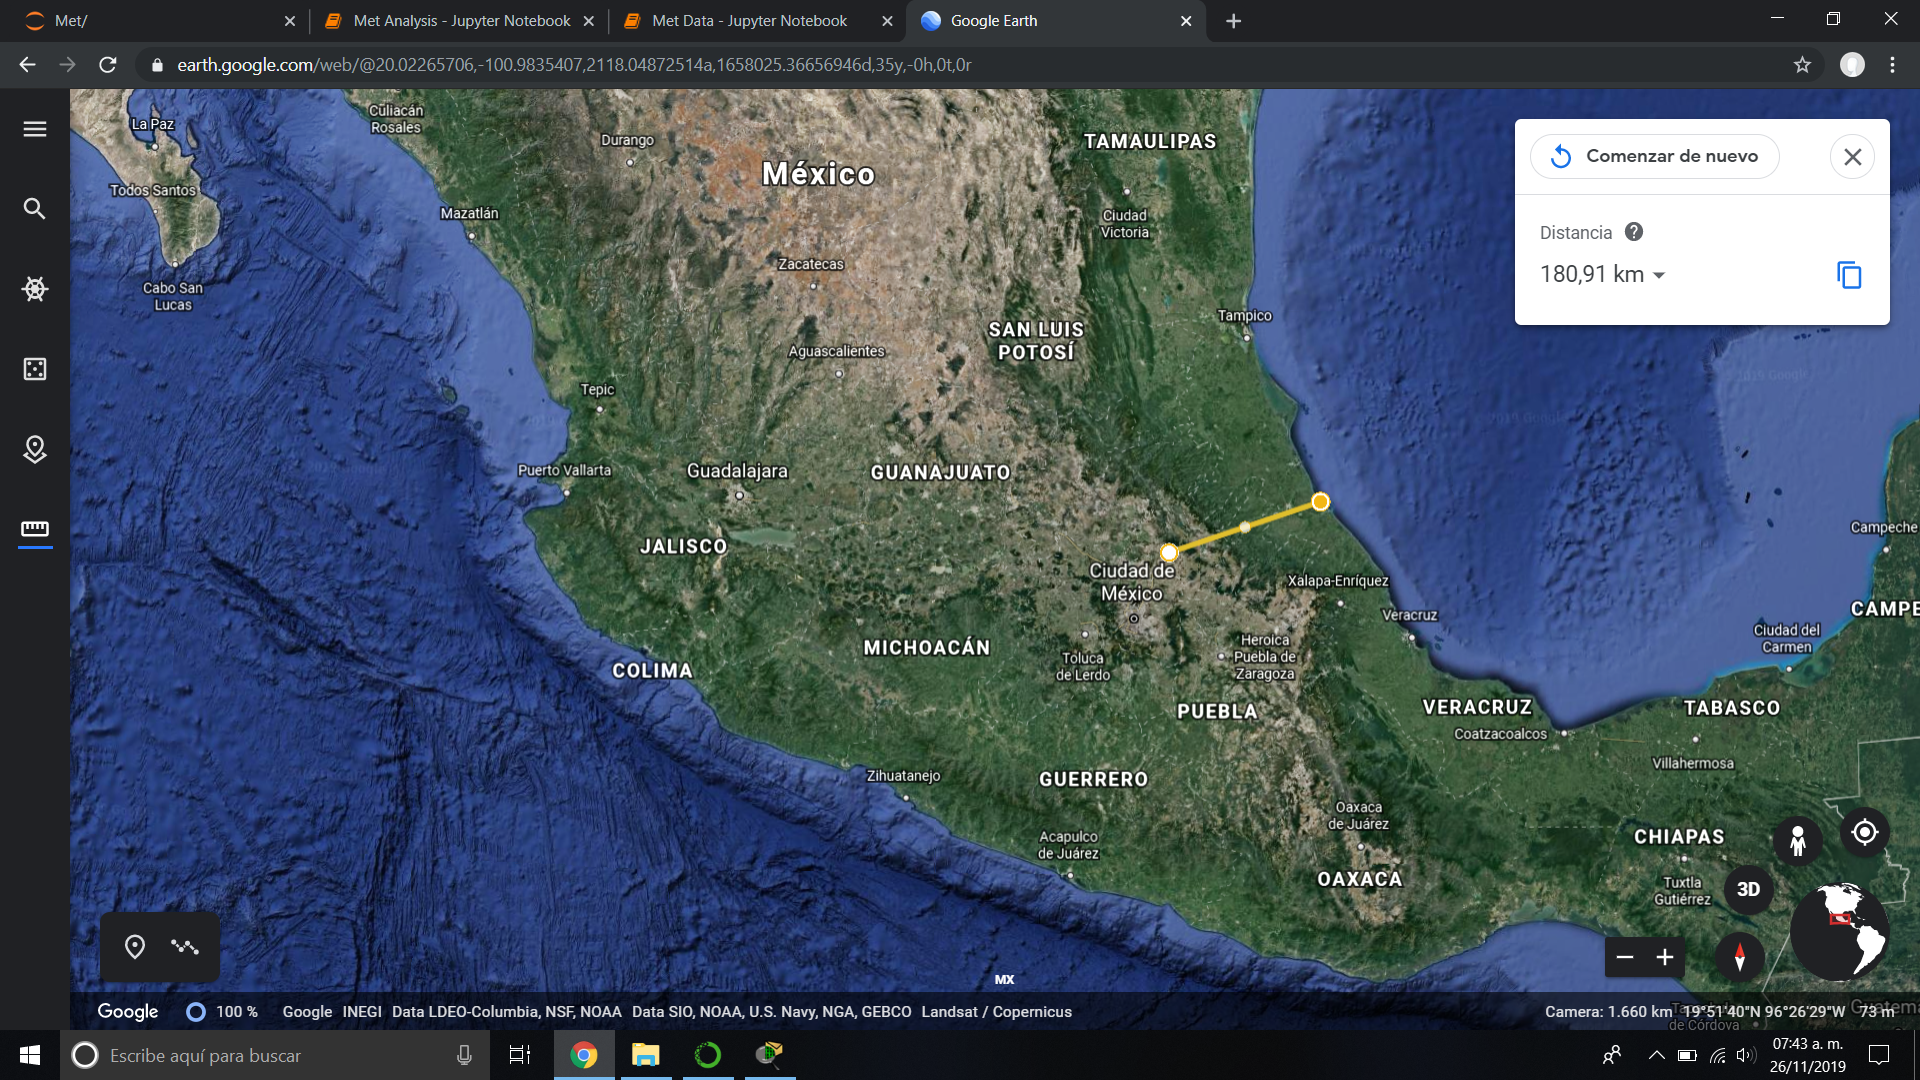

In [5]:
Image("Assets/map.png")

In [6]:
PueblaMet['Distancia al mar (km)'] = 218
TolucaMet['Distancia al mar (km)'] = 317
MoreliaMet['Distancia al mar (km)'] = 220
QueretaroMet['Distancia al mar (km)'] = 330
MonterreyMet['Distancia al mar (km)'] = 290
GuadalajaraMet['Distancia al mar (km)'] = 192
PachucaMet['Distancia al mar (km)'] = 180
LeonMet['Distancia al mar (km)'] = 378
ZacatecasMet['Distancia al mar (km)'] = 317
TijuanaMet['Distancia al mar (km)'] = 16

###### Nos debemos de asegurar de que la recoleccion de datos fue exitosa.  Al revisar la cantidad de filas de cada dataFrame sabremos si se cuenta con las que se supone que hemos capturado. De no ser asi, deberemos descartar la ciudad que presente cuestiones

In [7]:
print(PueblaMet.shape)
print(TolucaMet.shape)
print(MoreliaMet.shape)
print(QueretaroMet.shape)
print(MonterreyMet.shape)
print(GuadalajaraMet.shape)
print(PachucaMet.shape)
print(LeonMet.shape)
print(ZacatecasMet.shape)
print(TijuanaMet.shape)

(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)


###### Se grafica la relacion entre la temperatura y las diversas horas de captura. Por lo tanto, el eje y representara la temperatura y el eje x las horas transcurridas. Dentro de una misma grafica se colocan todas las ciudades, para observar si hay una relacion al graficar en color verde las ciudades mas cercanas al mar y en rojo las mas lejanas. 

C:\Users\david\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


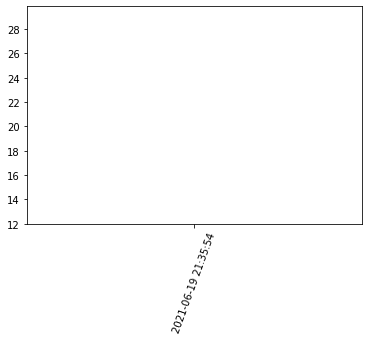

In [8]:
y1 = PueblaMet['Temperatura'] 
x1 = PueblaMet['Dia'] 
y2 = GuadalajaraMet['Temperatura'] 
y3 = TijuanaMet['Temperatura'] 
y4 = MoreliaMet['Temperatura'] 
y5 = LeonMet['Temperatura'] 
y6 = MonterreyMet['Temperatura'] 
y7 = QueretaroMet['Temperatura'] 
y8 = PachucaMet['Temperatura'] 
y9 = ZacatecasMet['Temperatura'] 
fig, ax = plt.subplots() 
plt.xticks(rotation=70) 
ax.plot(x1,y8,'g',x1,y2,'g',x1,y3,'g',x1,y1,'g')
ax.plot(x1,y4,'r',x1,y5,'r',x1,y6,'r',x1,y7,'r',x1,y9,'r')


###### Para el analisis de la informacion que se hara en relacion a la distancia al mar y las temperaturas, se deben guardar en estrcuturas de datos separadas las distancias al mar de cada ciudad y las temperaturas maximas y minimas de cada ciudad.

In [9]:
dist = [PueblaMet['Distancia al mar (km)'][0], 
        MoreliaMet['Distancia al mar (km)'][0],
        QueretaroMet['Distancia al mar (km)'][0],
        MonterreyMet['Distancia al mar (km)'][0],
        GuadalajaraMet['Distancia al mar (km)'][0],
        LeonMet['Distancia al mar (km)'][0],
        PachucaMet['Distancia al mar (km)'][0],
        ZacatecasMet['Distancia al mar (km)'][0],
        TijuanaMet['Distancia al mar (km)'][0]
       ]
tempMax = [PueblaMet['Temperatura'].max(), 
           MoreliaMet['Temperatura'].max(),
           QueretaroMet['Temperatura'].max(),
           MonterreyMet['Temperatura'].max(),
           GuadalajaraMet['Temperatura'].max(),
           LeonMet['Temperatura'].max(),
           PachucaMet['Temperatura'].max(),
           ZacatecasMet['Temperatura'].max(),
           TijuanaMet['Temperatura'].max()
          ]
tempMin = [PueblaMet['Temperatura'].min(), 
           MoreliaMet['Temperatura'].min(),
           QueretaroMet['Temperatura'].min(),
           MonterreyMet['Temperatura'].min(),
           GuadalajaraMet['Temperatura'].min(),
           LeonMet['Temperatura'].min(),
           PachucaMet['Temperatura'].min(),
           ZacatecasMet['Temperatura'].min(),
           TijuanaMet['Temperatura'].min()
          ]

###### Graficamos una relacion entre la distancia al mar y la temperatura maxima de cada ciudad. 

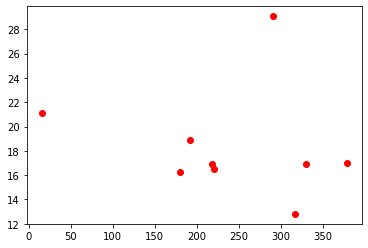

In [10]:
plt.plot(dist,tempMax,'ro')

###### Con ayuda de la libreria SVR para la regresion lineal y no lineal en vectores, almacenamos, respecto a lo observado por la relacion entre temperatura maxima y distancia al mar, generando dos rectas que iran en relacion a temperaturas observadas dentro de un rango menor a los 100 km y otro mayor a los 250 km. Se puede observar que la distancia al mar no es lo que uno esperaria, ya que la ciudad mas cercana no presenta las temperaturas mayores, dejando un margen demasiado corto para un fuerte efecto de cercania al mar. Sin embargo, la recta logra intersectar ligeramente con de las ciudades que se encuantran a mayor distancia. 

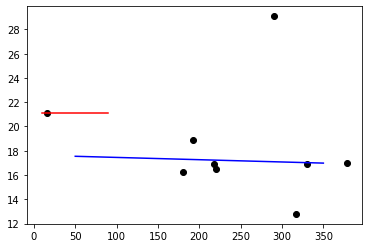

In [11]:
x = np.array(dist) 
y = np.array(tempMax) 
x1 = x[x<100] 
x1 = x1.reshape((x1.size,1)) 
y1 = y[x<100] 
x2 = x[x>250] 
x2 = x2.reshape((x2.size,1)) 
y2 = y[x>250] 
plt.scatter(x, y, c='k', label='data')
svr_lin1 = SVR(kernel='linear', C=1e3) 
svr_lin2 = SVR(kernel='linear', C=1e3) 
svr_lin1.fit(x1, y1) 
svr_lin2.fit(x2, y2) 
xp1 = np.arange(10,100,10).reshape((9,1)) 
xp2 = np.arange(50,400,50).reshape((7,1)) 
yp1 = svr_lin1.predict(xp1) 
yp2 = svr_lin2.predict(xp2) 
plt.plot(xp1, yp1, c='r', label='Strong sea effect') 
plt.plot(xp2, yp2, c='b', label='Light sea effect') 


###### En base a los datos de la grafica anterior, obtenemos los datos de interseccion entre las dos graficas 

In [12]:
print(svr_lin1.coef_) 
print( svr_lin1.intercept_) 
print( svr_lin2.coef_) 
print( svr_lin2.intercept_)

[[0.]]
[21.13]
[[-0.001875]]
[17.63875]


###### Las siguientes funciones nos ayudaran a obtener los resultados para graficar la interseccion exacta

In [13]:
def line1(x):    
    a1 = svr_lin1.coef_[0][0]    
    b1 = svr_lin1.intercept_[0]    
    return a1*x + b1 
def line2(x):    
    a2 = svr_lin2.coef_[0][0]    
    b2 = svr_lin2.intercept_[0]    
    return a2*x + b2 
def findIntersection(fun1,fun2,x0): 
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

###### Podemos observar que al graficar la interseccion exacta, el punto donde la distancia al mar es mas influyente en la temperatura es mas alla de los 78 km. Sin embargo, dado que todos los datos estan muy dispersos, esto puede afectar la precision del resultado.

[x,y] = [ -1861 , 21 ]


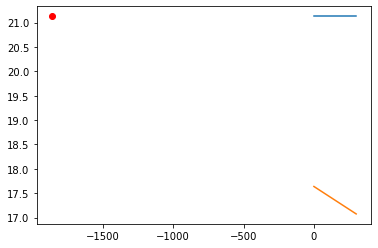

In [14]:
result = findIntersection(line1,line2,0.0) 
print("[x,y] = [ %d , %d ]" % (result,line1(result))) 
x = np.linspace(0,300,31) 
plt.plot(x,line1(x),x,line2(x),result,line1(result),'ro')

###### Tambien podemos revisar la relacion entre la distancia y la temperatura minima de cada ciudad

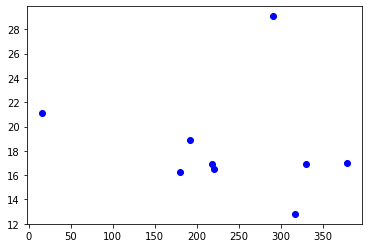

In [15]:
plt.plot(dist,tempMin,'bo')


###### Similar a la temperatura, podemos ver la relacion entre la humedad y cada hora de captura de cada una de las ciudades tomadas en cuenta. Una vez mas las mas cercanas al mar van de verde y las mas lejanas de rojo. 

C:\Users\david\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


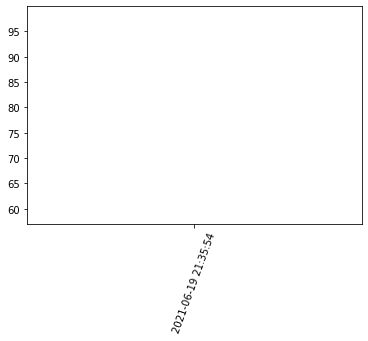

In [16]:
y1 = PueblaMet['Humedad'] 
x1 = PueblaMet['Dia'] 
y2 = GuadalajaraMet['Humedad'] 
y3 = TijuanaMet['Humedad'] 
y4 = MoreliaMet['Humedad'] 
y5 = LeonMet['Humedad'] 
y6 = MonterreyMet['Humedad'] 
y7 = QueretaroMet['Humedad'] 
y8 = PachucaMet['Humedad'] 
y9 = ZacatecasMet['Humedad'] 
fig, ax = plt.subplots() 
plt.xticks(rotation=70) 
ax.plot(x1,y8,'g',x1,y2,'g',x1,y3,'g',x1,y1,'g')
ax.plot(x1,y4,'r',x1,y5,'r',x1,y6,'r',x1,y7,'r',x1,y9,'r')

In [17]:
humeMax = [PueblaMet['Humedad'].max(), 
           MoreliaMet['Humedad'].max(),
           QueretaroMet['Humedad'].max(),
           MonterreyMet['Humedad'].max(),
           GuadalajaraMet['Humedad'].max(),
           LeonMet['Humedad'].max(),
           PachucaMet['Humedad'].max(),
           ZacatecasMet['Humedad'].max(),
           TijuanaMet['Humedad'].max()
          ]
humeMin = [PueblaMet['Humedad'].min(), 
           MoreliaMet['Humedad'].min(),
           QueretaroMet['Humedad'].min(),
           MonterreyMet['Humedad'].min(),
           GuadalajaraMet['Humedad'].min(),
           LeonMet['Humedad'].min(),
           PachucaMet['Humedad'].min(),
           ZacatecasMet['Humedad'].min(),
           TijuanaMet['Humedad'].min()
          ]

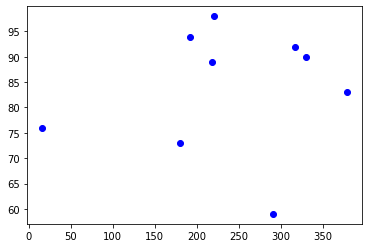

In [18]:
plt.plot(dist,humeMax,'bo')


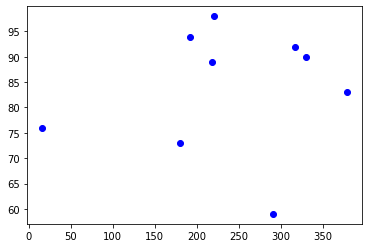

In [19]:
plt.plot(dist,humeMin,'bo')

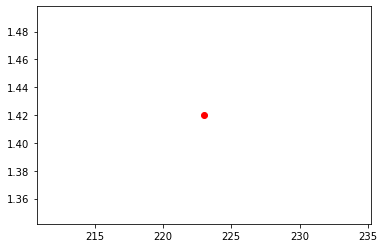

In [20]:
plt.plot(PueblaMet['Grados viento'],PueblaMet['Velocidad viento'],'ro')

In [21]:
hist, bins = np.histogram(PueblaMet['Grados viento'],8,[0,360]) 
print(hist) 
print(bins)

[0 0 0 0 1 0 0 0]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


In [22]:
def showRoseWind(values,city_name,max_value):   
    N = 8   
    theta = np.arange(0.,2 * np.pi, 2 * np.pi / N)   
    radii = np.array(values)   
    plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)   
    colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in radii]    
    plt.bar(theta +np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)   
    plt.title(city_name,x=0.2, fontsize=20)

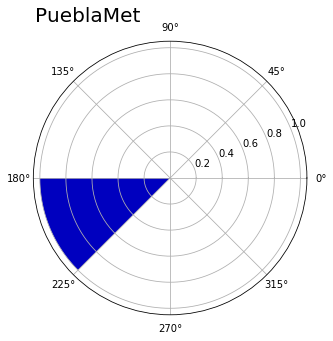

In [23]:
showRoseWind(hist,'PueblaMet',max(hist))


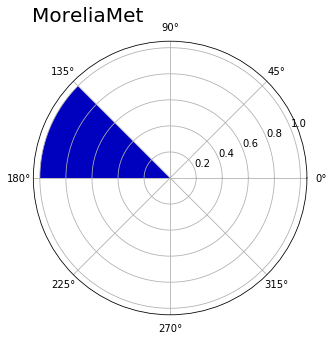

In [24]:
hist, bins = np.histogram(MoreliaMet['Grados viento'],8,[0,360]) 
showRoseWind(hist,'MoreliaMet',max(hist))

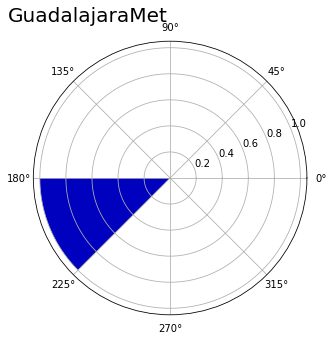

In [25]:
hist, bins = np.histogram(GuadalajaraMet['Grados viento'],8,[0,360]) 
showRoseWind(hist,'GuadalajaraMet',max(hist))

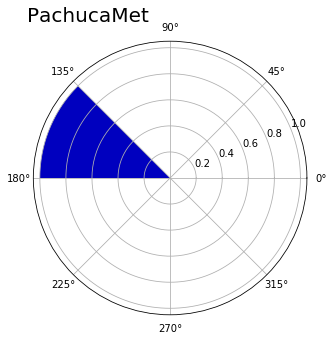

In [26]:
hist, bins = np.histogram(PachucaMet['Grados viento'],8,[0,360]) 
showRoseWind(hist,'PachucaMet',max(hist))

In [27]:
def roseWindSpeed(Met):
    degs = np.arange(45,361,45)
    tmp = []
    for deg in degs:
        tmp.append(Met[(Met['Grados viento']>(deg-46)) & (Met['Grados viento']<deg)]['Velocidad viento'].mean())
    return np.nan_to_num(tmp)

In [28]:
def showRoseWind_Speed(speeds,city_name):    
    N = 8    
    theta = np.arange(0,2 * np.pi, 2 * np.pi / N)    
    radii = np.array(speeds)    
    plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)    
    colors = [(1-x/10.0, 1-x/10.0, 0.75) for x in radii]     
    bars = plt.bar(theta+np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)    
    plt.title(city_name,x=0.2, fontsize=20)


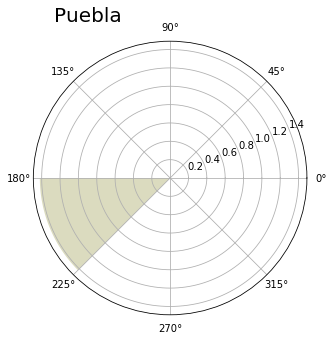

In [29]:
showRoseWind_Speed(roseWindSpeed(PueblaMet),'Puebla')